In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import pathlib as pl
import dotenv
import os
import datetime as dt

In [13]:
if not dotenv.load_dotenv():
    raise FileNotFoundError(".env not found")

In [14]:
temperaturas_path = pl.Path(os.environ["DATAPATH"]) / pl.Path("clean/temperatura.xlsx")

In [30]:
zones = pd.read_excel(temperaturas_path, sheet_name="zonas")
zones = zones.set_index("ID")['Zona']
zones

ID
1           Melipilla
2              Viluco
3          Pichidegua
4          Teno Prado
5           Santa Ana
6     Teno Don Sergio
7           Sarmiento
8    Los Niches Wapri
9     Santa Magdalena
Name: Zona, dtype: object

In [24]:
temps = pd.read_excel(temperaturas_path, sheet_name="temperaturas", parse_dates=False)
temps['fecha_datetime'] = pd.to_datetime(temps['fecha'].astype(str) + ' ' + temps['hora'].astype(str).apply(lambda x: x[-8::]))
temps['temperatura'] = pd.to_numeric(temps['temperatura'], errors='coerce')
temps = temps[['id', 'fecha_datetime', 'temperatura']]
temps

,id,fecha_datetime,temperatura
0,1,2024-01-01 00:00:00,14.500000
1,1,2024-01-01 01:00:00,13.700000
2,1,2024-01-01 02:00:00,13.000000
3,1,2024-01-01 03:00:00,12.300000
4,1,2024-01-01 04:00:00,11.800000
...,...,...,...
69701,9,2024-11-19 08:00:00,13.343167
69702,9,2024-11-19 09:00:00,15.180500
69703,9,2024-11-19 10:00:00,18.019000
69704,9,2024-11-19 11:00:00,20.021167


In [43]:
temps_by_id = {}
for id_ in temps['id'].unique():
    temps_by_id[id_] = temps.loc[temps['id'] == id_][['fecha_datetime', 'temperatura']].set_index('fecha_datetime')
    temps_by_id_date_range = temps_by_id[id_].index.min(), temps_by_id[id_].index.max()
    print(f"Zone {zones[id_]} has range {temps_by_id_date_range}")

Zone Melipilla has range (Timestamp('2024-01-01 00:00:00'), Timestamp('2024-11-17 23:00:00'))
Zone Viluco has range (Timestamp('2024-01-01 00:00:00'), Timestamp('2024-11-17 23:00:00'))
Zone Pichidegua has range (Timestamp('2024-01-01 00:00:00'), Timestamp('2024-11-17 23:00:00'))
Zone Teno Prado has range (Timestamp('2024-01-01 00:00:00'), Timestamp('2024-11-17 23:00:00'))
Zone Santa Ana has range (Timestamp('2024-01-01 00:00:00'), Timestamp('2024-11-30 23:00:00'))
Zone Teno Don Sergio has range (Timestamp('2024-01-01 00:00:00'), Timestamp('2024-11-19 15:00:00'))
Zone Sarmiento has range (Timestamp('2024-01-01 00:00:00'), Timestamp('2024-11-17 23:00:00'))
Zone Los Niches Wapri has range (Timestamp('2024-01-01 00:00:00'), Timestamp('2024-11-19 12:00:00'))
Zone Santa Magdalena has range (Timestamp('2024-01-01 00:00:00'), Timestamp('2024-11-19 12:00:00'))


In [44]:
fecha_min = dt.datetime(2024,1,1,0,0,0)
fecha_max = dt.datetime(2024,11,18,0,0,0)
full_idx  = pd.date_range(fecha_min, fecha_max)

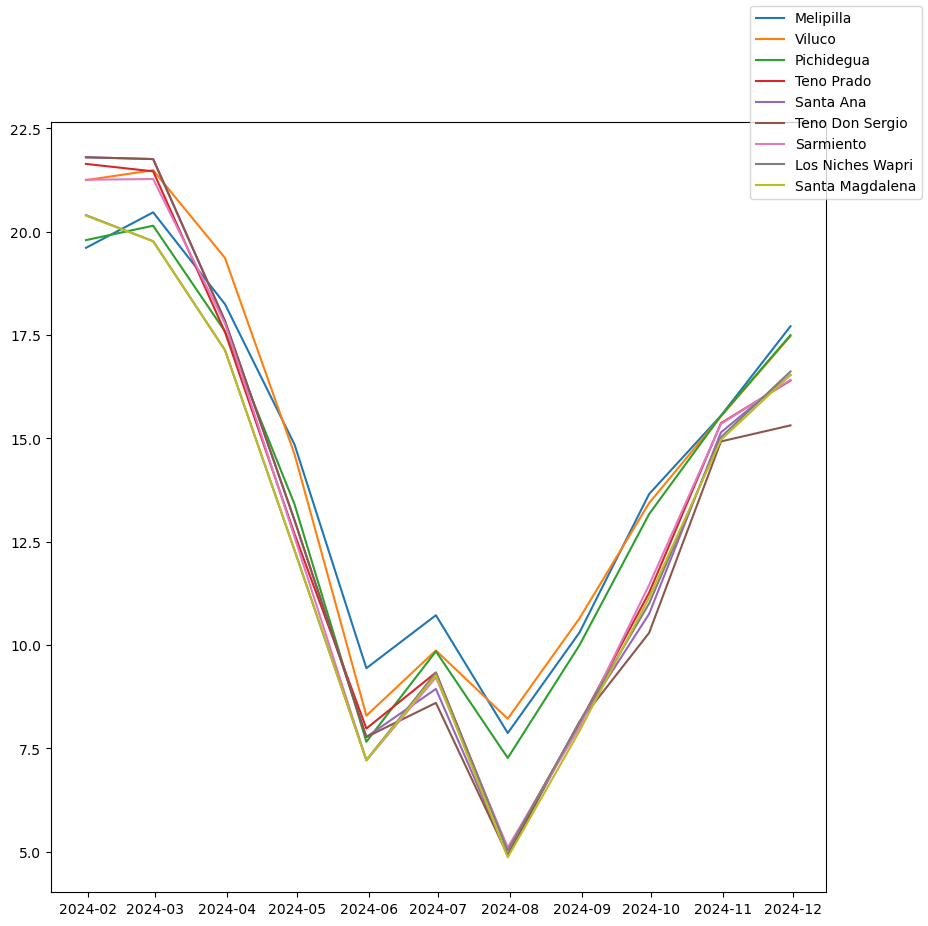

In [77]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
for k, v in temps_by_id.items():
    v_t = v.resample("ME").mean().bfill()
    line = ax.plot(v_t.index, v_t.temperatura, label=zones[k])
fig.legend()

In [69]:
SAVE_OUTPUT = False
if SAVE_OUTPUT:
    output_path = pl.Path(os.environ["DATAPATH"]) / pl.Path("cleanest")
    output_path.mkdir(parents=True, exist_ok=True)

    zones.to_csv(output_path / 'zones.csv')
    for k, v in temps_by_id.items():
        v.to_csv(output_path / f'temp_zone={k}.csv')
